In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import football as fb
import os

In [18]:
#read Copy of Accuyield_Test_Package_Data_Scientist_V3(1).xlsx sheet 2
df = pd.read_excel('Copy of Accuyield_Test_Package_Data_Scientist_V3(1).xlsx', sheet_name=1)



In [42]:
#filter either hometeam or awayteam is 'Arsenal' and 'Sheffield United'
team_1 = 'Arsenal'
team_2 = 'Sheffield United'

dfx = df[(df['HomeTeam'] == team_1) & (df['AwayTeam'] == team_2) | (df['HomeTeam'] == team_2) & (df['AwayTeam'] == team_1)]
dfx.columns

Index(['MatchID', 'League', 'Season', 'Week', 'Round', 'Date', 'Time',
       'HomeTeam', 'AwayTeam', 'HomeScore', 'AwayScore', 'TotalGoals',
       'Result', 'HomeCornerKicks', 'AwayCornerKicks', 'HomeCornerKicksHT',
       'AwayCornerKicksHT', 'HomeYellowCards', 'AwayYellowCards', 'HomeShots',
       'AwayShots', 'HomeShotsOnGoal', 'AwayShotsOnGoal', 'HomeAttacks',
       'AwayAttacks', 'HomeDangerousAttacks', 'AwayDangerousAttacks',
       'HomeShotsOffGoal', 'AwayShotsOffGoal', 'HomeBlocked', 'AwayBlocked',
       'HomeFreeKicks', 'AwayFreeKicks', 'HomePossession', 'AwayPossession',
       'HomePossessionHT', 'AwayPossessionHT', 'HomePasses', 'AwayPasses',
       'HomeSuccessfulPassesPct', 'AwaySuccessfulPassesPct', 'HomeFouls',
       'AwayFouls', 'HomeOffsides', 'AwayOffsides', 'HomeAerials',
       'AwayAerials', 'HomeAerialsWon', 'AwayAerialsWon', 'HomeSaves',
       'AwaySaves', 'HomeTackles', 'AwayTackles', 'HomeDribbles',
       'AwayDribbles', 'HomeThrowIns', 'AwayThrowIns'

In [44]:
dfx[['MatchID', 'League', 'Season', 'Week', 'Round', 'Date', 'Time',
       'HomeTeam', 'AwayTeam', 'HomeScore', 'AwayScore', 'TotalGoals',
       'Result']]

,MatchID,League,Season,Week,Round,Date,Time,HomeTeam,AwayTeam,HomeScore,AwayScore,TotalGoals,Result
849,1720901,English Premier League,2019-2020,9,9,2019-10-22,03:00:00,Sheffield United,Arsenal,1,0,1,H
980,1721894,English Premier League,2019-2020,23,23,2020-01-18,23:00:00,Arsenal,Sheffield United,1,1,2,D
1174,1903841,English Premier League,2020-2021,4,4,2020-10-04,21:00:00,Arsenal,Sheffield United,2,1,3,H
1447,1904066,English Premier League,2020-2021,31,39,2021-04-12,02:00:00,Sheffield United,Arsenal,0,3,3,A
2373,2399147,English Premier League,2023-2024,10,11,2023-10-28,22:00:00,Arsenal,Sheffield United,5,0,5,H
2547,2399325,English Premier League,2023-2024,27,29,2024-03-05,04:00:00,Sheffield United,Arsenal,0,6,6,A


In [22]:
#split df by season
for i in df['Season'].unique():
    print(i)
    season_df = df[df['Season'] == i]



2017-2018
2018-2019
2019-2020
2020-2021
2021-2022
2022-2023
2023-2024


In [24]:
import pandas as pd

# Assuming 'season_df' is your main DataFrame with match data
teams = pd.concat([season_df['HomeTeam'], season_df['AwayTeam']]).unique()

# Initialize a dictionary to store aggregated stats
team_stats = {team: {} for team in teams}
calender_date = season_df['Date'].unique()
# Iterate over each team and aggregate data
for team in teams:
    # Home statistics (when the team is the home team)
    home_matches = season_df[season_df['HomeTeam'] == team]
    home_goals_scored = home_matches['HomeScore'].sum()
    home_goals_conceded = home_matches['AwayScore'].sum()
    home_corners = home_matches['HomeCornerKicks'].sum()
    home_yellow_cards = home_matches['HomeYellowCards'].sum()
    home_shots = home_matches['HomeShots'].sum()
    
    # Away statistics (when the team is the away team)
    away_matches = season_df[season_df['AwayTeam'] == team]
    away_goals_scored = away_matches['AwayScore'].sum()
    away_goals_conceded = away_matches['HomeScore'].sum()
    away_corners = away_matches['AwayCornerKicks'].sum()
    away_yellow_cards = away_matches['AwayYellowCards'].sum()
    away_shots = away_matches['AwayShots'].sum()
    
    # Total statistics
    total_matches_played = len(home_matches) + len(away_matches)
    total_goals_scored = home_goals_scored + away_goals_scored
    total_goals_conceded = home_goals_conceded + away_goals_conceded
    
    # Store aggregated data in the dictionary
    team_stats[team] = {
        'MatchesPlayed': total_matches_played,
        'GoalsScored': total_goals_scored,
        'GoalsConceded': total_goals_conceded,
        'GoalDifference': total_goals_scored - total_goals_conceded,
        'HomeGoalsScored': home_goals_scored,
        'AwayGoalsScored': away_goals_scored,
        'HomeCornerKicks': home_corners,
        'AwayCornerKicks': away_corners,
        'HomeYellowCards': home_yellow_cards,
        'AwayYellowCards': away_yellow_cards,
        'HomeShots': home_shots,
        'AwayShots': away_shots
    }

# Convert dictionary to DataFrame
team_stats_season_df = pd.DataFrame.from_dict(team_stats, orient='index')
team_stats_season_df

,MatchesPlayed,GoalsScored,GoalsConceded,GoalDifference,HomeGoalsScored,AwayGoalsScored,HomeCornerKicks,AwayCornerKicks,HomeYellowCards,AwayYellowCards,HomeShots,AwayShots
Burnley,38,41,78,-37,19,22,106,74,28,50,254,180
Arsenal,38,91,29,62,48,43,139,126,32,30,360,297
Everton,38,40,51,-11,22,18,93,88,34,47,295,213
Sheffield United,38,35,104,-69,19,16,78,63,49,49,206,159
AFC Bournemouth,38,54,67,-13,27,27,134,101,33,43,275,267
Brighton Hove Albion,38,55,62,-7,30,25,134,72,34,54,304,259
Newcastle United,38,85,62,23,49,36,112,80,30,44,330,220
Brentford,38,56,65,-9,29,27,92,93,37,50,261,214
Chelsea,38,77,63,14,44,33,115,87,43,60,313,235
Manchester United,38,57,58,-1,31,26,148,76,37,45,319,231


<Axes: title={'center': 'YellowCards by Team'}>

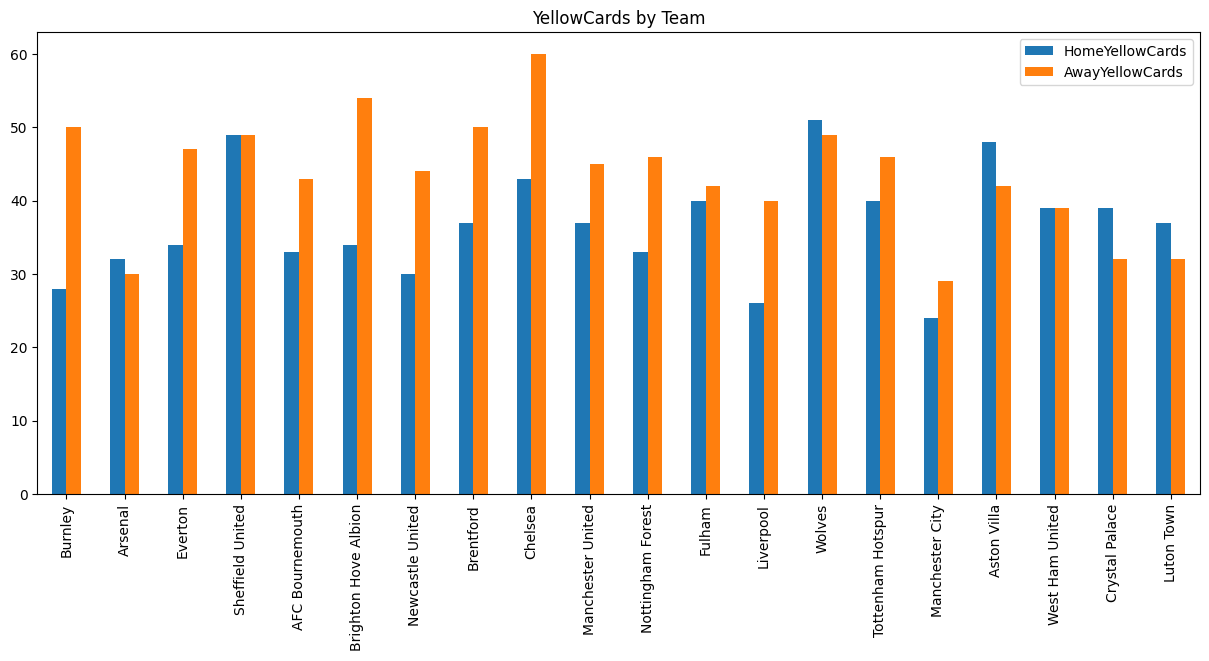

In [49]:
target = 'YellowCards'
team_stats_season_df[[f'Home{target}',f'Away{target}']].plot(kind='bar', figsize=(15, 6), title=f'{target} by Team')

In [79]:
season_df['Date'] = pd.to_datetime(season_df['Date'])  # Ensure the 'Date' column is in datetime format
season_df = season_df.sort_values('Date')  # Sort matches by date
calendar_dates = season_df['Date'].unique()
teams = pd.concat([season_df['HomeTeam'], season_df['AwayTeam']]).unique()
team_stats_daily = []


if not os.path.exists('relationship_matrix'):
    os.makedirs('relationship_matrix')

# Iterate over each calendar date
for current_date in calendar_dates:
    matches_up_to_date = season_df[season_df['Date'] <= current_date]
    possession_matrix  = fb.create_relationship_matrix(matches_up_to_date, 'Possession')

#save the relationship matrix into the folder
possession_matrix

    

,Burnley,Arsenal,Everton,Sheffield United,AFC Bournemouth,Brighton Hove Albion,Newcastle United,Brentford,Chelsea,Manchester United,Wolves,Liverpool,Nottingham Forest,Fulham,Tottenham Hotspur,Manchester City,Aston Villa,West Ham United,Crystal Palace,Luton Town
Burnley,0.00,-0.58,0.52,0.30,0.60,-0.54,-0.12,0.22,-0.64,0.28,0.00,-0.78,0.52,-0.44,-0.34,-0.80,-0.18,-0.02,0.24,-0.20
Arsenal,0.58,0.00,0.88,0.96,0.26,-0.10,0.28,0.70,0.02,0.02,0.20,-0.18,1.04,0.64,-0.32,-0.48,0.26,0.90,0.28,0.50
Everton,-0.52,-0.88,0.00,0.24,-0.02,-0.88,-0.40,-0.20,-0.64,-0.02,-0.14,-1.08,-0.42,-0.58,-0.38,-0.88,-0.58,-0.18,-0.08,0.34
Sheffield United,-0.30,-0.96,-0.24,0.00,-0.50,-0.84,-0.34,-0.26,-0.90,-0.68,-0.50,-1.20,0.08,-0.68,-0.94,-1.20,-0.84,0.10,-0.42,-0.48
AFC Bournemouth,-0.60,-0.26,0.02,0.50,0.00,-0.62,-0.30,-0.28,-0.52,-0.52,-0.58,-0.50,0.26,-0.14,-0.14,-0.54,-0.38,0.26,-0.20,0.10
Brighton Hove Albion,0.54,0.10,0.88,0.84,0.62,0.00,-0.02,0.58,0.44,0.22,0.52,-0.18,0.34,0.84,-0.12,-0.38,0.30,0.94,0.66,0.62
Newcastle United,0.12,-0.28,0.40,0.34,0.30,0.02,0.00,0.06,0.18,0.26,0.02,-0.06,0.48,0.08,-0.60,-0.64,-0.16,0.48,0.26,0.40
Brentford,-0.22,-0.70,0.20,0.26,0.28,-0.58,-0.06,0.00,-0.74,-0.32,-0.22,-0.44,0.12,0.00,-0.76,-0.84,-0.76,0.34,0.24,0.32
Chelsea,0.64,-0.02,0.64,0.90,0.52,-0.44,-0.18,0.74,0.00,0.24,0.66,0.30,0.88,0.00,-0.02,-0.50,0.48,0.90,0.82,0.32
Manchester United,-0.28,-0.02,0.02,0.68,0.52,-0.22,-0.26,0.32,-0.24,0.00,0.00,-0.62,0.42,0.24,-0.38,-0.66,-0.20,0.34,0.70,0.12


In [52]:
season_df['Date'] = pd.to_datetime(season_df['Date'])  # Ensure the 'Date' column is in datetime format
season_df = season_df.sort_values('Date')  # Sort matches by date
calendar_dates = season_df['Date'].unique()
teams = pd.concat([season_df['HomeTeam'], season_df['AwayTeam']]).unique()
team_stats_daily = []

# Iterate over each calendar date
for current_date in calendar_dates:
    matches_up_to_date = season_df[season_df['Date'] <= current_date]
    for team in teams:
        home_matches = matches_up_to_date[matches_up_to_date['HomeTeam'] == team]
        home_goals_scored = home_matches['HomeScore'].sum()
        home_goals_conceded = home_matches['AwayScore'].sum()
        home_corners = home_matches['HomeCornerKicks'].sum()
        home_yellow_cards = home_matches['HomeYellowCards'].sum()
        home_shots = home_matches['HomeShots'].sum()
        away_matches = matches_up_to_date[matches_up_to_date['AwayTeam'] == team]
        away_goals_scored = away_matches['AwayScore'].sum()
        away_goals_conceded = away_matches['HomeScore'].sum()
        away_corners = away_matches['AwayCornerKicks'].sum()
        away_yellow_cards = away_matches['AwayYellowCards'].sum()
        away_shots = away_matches['AwayShots'].sum()
        total_matches_played = len(home_matches) + len(away_matches)
        total_goals_scored = home_goals_scored + away_goals_scored
        total_goals_conceded = home_goals_conceded + away_goals_conceded
        team_stats_daily.append({
            'Team': team,
            'Date': current_date,
            'MatchesPlayed': total_matches_played,
            'GoalsScored': total_goals_scored,
            'GoalsConceded': total_goals_conceded,
            'GoalDifference': total_goals_scored - total_goals_conceded,
            'HomeGoalsScored': home_goals_scored,
            'AwayGoalsScored': away_goals_scored,
            'HomeCornerKicks': home_corners,
            'AwayCornerKicks': away_corners,
            'HomeYellowCards': home_yellow_cards,
            'AwayYellowCards': away_yellow_cards,
            'HomeShots': home_shots,
            'AwayShots': away_shots
        })
team_stats_daily_df = pd.DataFrame(team_stats_daily)


,Team,Date,MatchesPlayed,GoalsScored,GoalsConceded,GoalDifference,HomeGoalsScored,AwayGoalsScored,HomeCornerKicks,AwayCornerKicks,HomeYellowCards,AwayYellowCards,HomeShots,AwayShots
0,Burnley,2023-08-12,1,0,3,-3,0,0,6,0,1,0,6,0
1,Arsenal,2023-08-12,1,2,1,1,2,0,8,0,0,0,15,0
2,Everton,2023-08-12,1,0,1,-1,0,0,10,0,0,0,19,0
3,Sheffield United,2023-08-12,1,0,1,-1,0,0,5,0,0,0,8,0
4,AFC Bournemouth,2023-08-12,1,1,1,0,1,0,10,0,0,0,14,0
5,Brighton Hove Albion,2023-08-12,1,4,1,3,4,0,6,0,0,0,27,0
6,Newcastle United,2023-08-12,0,0,0,0,0,0,0,0,0,0,0,0
7,Brentford,2023-08-12,0,0,0,0,0,0,0,0,0,0,0,0
8,Chelsea,2023-08-12,0,0,0,0,0,0,0,0,0,0,0,0
9,Manchester United,2023-08-12,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
for day in team_stats_daily_df['Date'].unique():
    day_df = team_stats_daily_df[team_stats_daily_df['Date'] == day]
day_df

,Team,Date,MatchesPlayed,GoalsScored,GoalsConceded,GoalDifference,HomeGoalsScored,AwayGoalsScored,HomeCornerKicks,AwayCornerKicks,HomeYellowCards,AwayYellowCards,HomeShots,AwayShots
2460,Burnley,2024-05-19,38,41,78,-37,19,22,106,74,28,50,254,180
2461,Arsenal,2024-05-19,38,91,29,62,48,43,139,126,32,30,360,297
2462,Everton,2024-05-19,38,40,51,-11,22,18,93,88,34,47,295,213
2463,Sheffield United,2024-05-19,38,35,104,-69,19,16,78,63,49,49,206,159
2464,AFC Bournemouth,2024-05-19,38,54,67,-13,27,27,134,101,33,43,275,267
2465,Brighton Hove Albion,2024-05-19,38,55,62,-7,30,25,134,72,34,54,304,259
2466,Newcastle United,2024-05-19,38,85,62,23,49,36,112,80,30,44,330,220
2467,Brentford,2024-05-19,38,56,65,-9,29,27,92,93,37,50,261,214
2468,Chelsea,2024-05-19,38,77,63,14,44,33,115,87,43,60,313,235
2469,Manchester United,2024-05-19,38,57,58,-1,31,26,148,76,37,45,319,231
